# Analyse fréquentielle

L'analyse fréquentielle consiste à analyser le comportement d'un système dynamique soumis à une sinusoïde dont on fait varier la fréquence.

Soit la fonction de transfert suivante:

$$ H(s) = \frac{a_n s^n + a_{n-1} s^{n-1} + \dots + a_1 s + a_0}{b_m s^m + b_{m-1} s^{m-1} + \dots + b_1 s + b_0} \quad n \le m $$

On suppose que tous les zéros et les pôles de la fonction de transfert sont réels.

La fonction de transfert peut être mise sous l'une des 2 formes génériques suivantes:

- forme d'Evans:

$$ H(s) = k \frac{(s-z_1)(s-z_2)\dots(s-z_n)}{(s-p_1)(s-p_2)\dots(s-p_m)} $$

- forme de Bode:

$$ H(s) = K \frac{(T_1s+1)(T_2s+1)\dots(T_ns+1)}{(\Theta_1s+1)(\Theta_2s+1)\dots(\Theta_ms+1)} $$

La forme d'Evans fait apparaître les zéros et les pôles, le gain $k$ n'ayant aucune signification physique, alors que la forme de Bode fait apparaître les constantes de temps (temps pour que le système atteigne $63\, \mathrm{\%}$ de sa valeur finale) et le gain statique.

La figure suivante permet de représenter un système du premier ordre, ou $\tau$ représente la constante de temps:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('../my_params.mplstyle')

import RegulScipy3 as rs

In [2]:
Hs = rs.LinSys([2], [10, 1])

t, yout = rs.step(Hs)

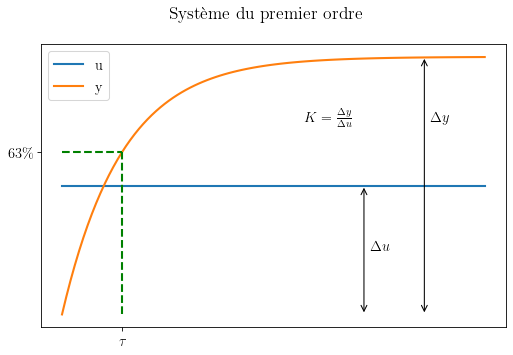

In [5]:
fig, ax = plt.subplots()
ax.plot(t, [1 for _ in range(len(t))], label='u')
ax.plot(t, yout, '-', label='y')
fig.suptitle('Système du premier ordre')
ax.legend()

ax.plot([0, 10], [0.63*2, 0.63*2], 'g--')
ax.plot([10, 10], [0, 0.63*2], 'g--')

ax.set_xticks([10])
ax.set_xticklabels([r'$\tau$'])
ax.set_yticks([0.63 * 2])
ax.set_yticklabels([r'$63\%$'])

ax.annotate(text='', xy=(60, 0), xytext=(60, 2), arrowprops=dict(arrowstyle='<->'))
ax.annotate(text='', xy=(50, 0), xytext=(50, 1), arrowprops=dict(arrowstyle='<->'))

ax.text(40, 1.5, r'$K=\frac{\Delta y}{\Delta u}$')
ax.text(61, 1.5, r'$\Delta y$')
_ = ax.text(51, 0.5, r'$\Delta u$')

Afin d'effectuer une analyse fréquentielle, il suffit de remplacer $s=j\omega$ pour passer de la transformée de Laplace à la transformée de Fourier. La fonction de transfert devient alors, sous la forme de Bode:

$$ H(s) = K \frac{(T_1j\omega+1)(T_2j\omega+1)\dots(T_nj\omega+1)}{(\Theta_1j\omega+1)(\Theta_2j\omega+1)\dots(\Theta_mj\omega+1)} $$

Chaque élément représente un nombre complexe sous forme cartésienne. Posons la transformation suivante:

$$ Tj\omega + 1 = A e^{j\varphi} $$

avec $A=\sqrt{(T\omega)^2+1}$ et $\varphi=\arctan{T\omega}$.

La fonction de transfert devient finalement:

\begin{align}
  H(j\omega) &= K \frac{A_1e^{j\varphi_1} A_2e^{j\varphi_2} \dots A_ne^{j\varphi_n}}{B_1e^{j\delta_1} B_2e^{j\delta_2} \dots B_me^{j\delta_m}} \\
  H(j\omega) &= G e^{j\phi}
\end{align}

avec:

\begin{align}
  G(\omega) &= K \frac{ \prod_{i=1}^n A_i }{ \prod_{j=1}^m B_j } \\
  \phi(\omega) &= \sum_{i=1}^n \varphi_i - \sum_{j=1}^m \delta_j
\end{align}

Le résultat obtenu montre que le module (aussi appelé gain) et la phase de la fonction de transfert sont fonction de $\omega$.

Il peut ainsi être intéressant de tracer les graphiques de $G(\omega)$ et $\phi(\omega)$ afin d'analyser aisément leur évolution en fonction de la fréquence de l'entrée. La représentation la plus utilisée s'appelle les diagrammes de Bode. Ce sont 2 graphiques superposés, l'un représentant le gain et l'autre la phase. Cependant, le gain est transformé en gain logarithmique en utilisant la transformation mathématique suivante:

$$ G_{dB} = 20 \log_{10}G $$

Cette transformation permet de remplacer les produits dans la formule de $G(\omega)$ par des sommes:

$$ G_{dB} = 20 \log_{10} K + 20 \left( \sum_{i=1}^n \log_{10} A_i - \sum_{j=1}^m \log_{10} B_j \right) $$

Grâce à cette transformation, le gain en décibel ainsi que la phase de la fonction de transfert peuvent être calculés séparément à partir de la forme de Bode. Les diagrammes finaux seront construits par la somme des diagrammes de tous les termes du numérateurs auquels on soustrait tous les termes du dénominateur.

La figure suivante représente un diagramme de Bode d'un système du premier ordre défini ainsi:

$$ H(s) = \frac{2}{10s+1} $$

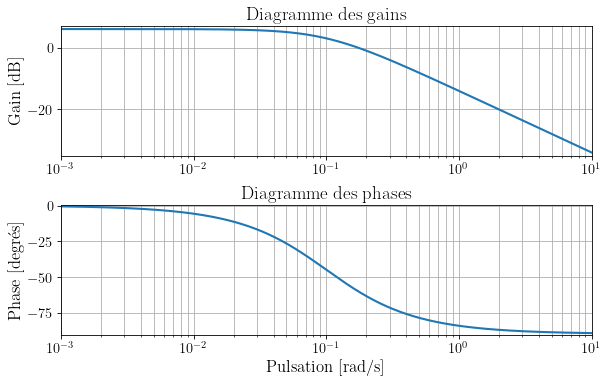

In [6]:
w, mag, phase = rs.bode(Hs)

L'axe des abscisses est un axe logarithmique, permettant de balayer un plus grand spectre de fréquences, alors que l'axe des ordonnées est un axe linéaire.

L'analyse du graphique montre qu'il peut aisément être approximé par des asymptotes. La figure suivante représente une approximation suffisamment proche de la réalité:

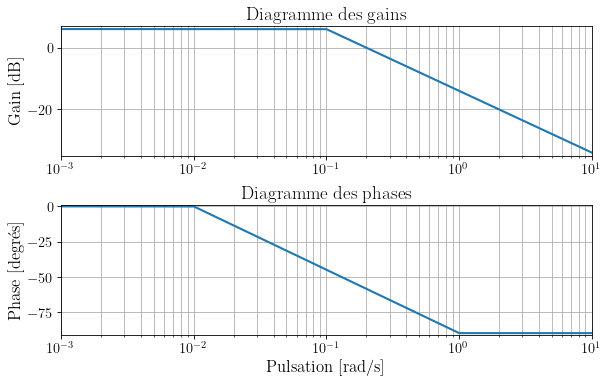

In [7]:
w, mag_as, phase_as = rs.bodeasympt(Hs, 1)

En superposant les 2 graphiques, on obtient:

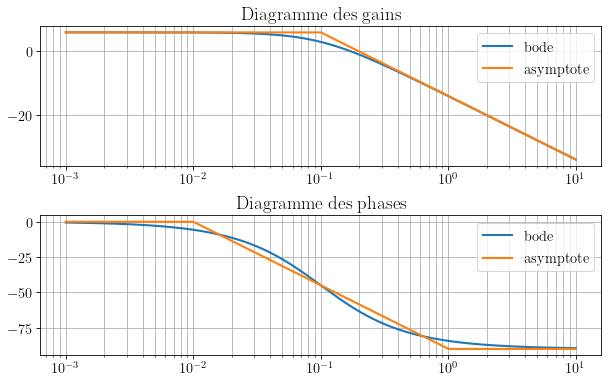

In [8]:
fig, axs = plt.subplots(2, 1, constrained_layout=True)
axs[0].semilogx(w, mag, label='bode')
axs[0].semilogx(w, mag_as, label='asymptote')
axs[1].semilogx(w, phase, label='bode')
axs[1].semilogx(w, phase_as, label='asymptote')
axs[0].set_title('Diagramme des gains')
axs[1].set_title('Diagramme des phases')
axs[0].legend()
axs[1].legend()
axs[0].grid(True, which='both')
axs[1].grid(True, which='both')

Les diagrammes asymptotiques semblent être une bonne approximation des diagrammes de Bode réels.

Afin de les obtenir, il suffit d'effectuer une analyse mathématique très simple. L'exemple suivant illustre la méthode.

Une seconde approximation de la phase, plus simple mais moins précise, donne:

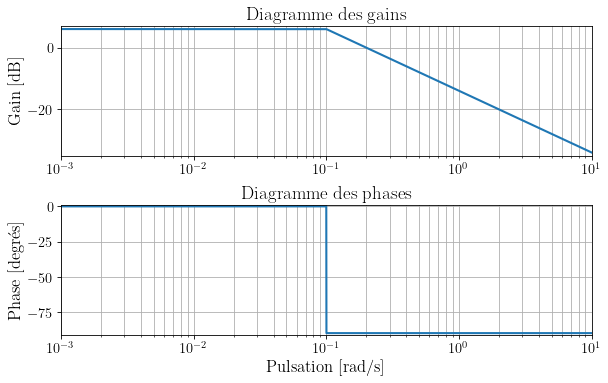

In [7]:
w, mag_as, phase_as = rs.bodeasympt(Hs)

Cette dernière étant réutilisée dans de nombreuses activités à l'ISIB, elle sera gardée dans cette activité aussi pour plus de cohérence.

#### Exemple

Soit à tracer le diagramme asymptotique de l'élément $Ts + 1$.

En remplaçant $s=j\omega$, l'élément devient $Tj\omega + 1$.

Ce nombre complexe possède un module et une phase égaux à:

\begin{align}
  G_{dB} &= 20 \log_{10} \sqrt{(T\omega)^2 + 1} \\
  \phi &= \arctan{T\omega}
\end{align}

Pour les basses fréquences, lorsque $\omega \ll \frac{1}{T}$, on a:

\begin{align}
  G_{dB} &= 20 \log_{10} \sqrt{1} = 0\, \mathrm{dB} \\
  \phi &= \arctan{0} = 0\,^\circ 
\end{align}

Autrement dit, le gain en décibel et la phase valent 0 pour tout $\omega \le \frac{1}{T}$.

Pour les hautes fréquences, lorsque $\omega \gg \frac{1}{T}$, on a:

\begin{align}
  G_{dB} &= 20 \log_{10} T\omega = 20 \log_{10} T + 20 \log_{10} \omega \\
  \phi &= \arctan{0} = 90\,^\circ 
\end{align}

Autrement dit, la phase vaut $90\,^\circ$ pour tout $\omega>\frac{1}{T}$ et le gain est une droite de pente $+20\, \mathrm{dB/dec}$.

***

Il est à remarquer que les diagrammes asymptotiques perdent petit à petit leur intérêt. En effet, leur principal atout est qu'il est possible d'obtenir une approximation relativement proche des diagrammes réels sans effectuer de gros calculs et très rapidement (quelques minutes suffisent pour de grosses fonctions de transfert). Cependant, les diagrammes sont entâchés d'erreurs et, à l'heure d'aujourd'hui, les ordinateurs permettent de tracer les diagrammes réels avec grande précision et en moins de temps que ne peut le faire un humain entraîné avec les diagrammes asymptotiques.

## Exercices

Tracer les diagrammes de Bode asymptotiques des fonctions de transfert suivantes:

\begin{align}
  1. \quad H(s) &= \frac{1}{10s+1} \\
  2. \quad H(s) &= \frac{1}{100s} \\
  3. \quad H(s) &= \frac{10(s+1)}{(s+10)(10s+0.1)} \\
  4. \quad H(s) &= 10e^{100s}
\end{align}